In [45]:
#Import the packages that we are going to use for this dataset
import pandas as pd #Dataframe package
import numpy as np #Linear algebra package
import matplotlib.pyplot as plt #Plotting package
import seaborn as sns #Advanced plotting package

## Import Dataset both the Train and the Test Data

In [46]:
df_1 = pd.read_csv('train.csv')
df_2 = pd.read_csv('test.csv')
if 'exam_score' not in df_2.columns:
#This checks if the column 'exam_score' is in the test data, if not it creates it and fills it with 0s
    df_2['exam_score'] = 0

    df = pd.concat([df_1, df_2], axis=0)
    # Combine training and test data into a single dataframe for preprocessing
    df = df.set_index('id')
    # Set 'Id' as the index for easier data manipulation

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 900000 entries, 0 to 899999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               900000 non-null  int64  
 1   gender            900000 non-null  object 
 2   course            900000 non-null  object 
 3   study_hours       900000 non-null  float64
 4   class_attendance  900000 non-null  float64
 5   internet_access   900000 non-null  object 
 6   sleep_hours       900000 non-null  float64
 7   sleep_quality     900000 non-null  object 
 8   study_method      900000 non-null  object 
 9   facility_rating   900000 non-null  object 
 10  exam_difficulty   900000 non-null  object 
 11  exam_score        900000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 89.3+ MB


,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
id,,,,,,,,,,,,
0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [47]:
# To better understand the data, we can use the describe() function to get a statistical summary of the numerical columns in the dataframe. This will give us insights into the distribution, central tendency, and spread of the data, which can help us identify any potential issues or patterns that may be relevant for our analysis or modeling.
df.describe()

,age,study_hours,class_attendance,sleep_hours,exam_score
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,20.545316,4.002800,71.985836,7.072552,43.754671
std,2.260301,2.359238,17.425469,1.745021,32.725867
min,17.000000,0.080000,40.600000,4.100000,0.000000
25%,19.000000,1.980000,57.000000,5.600000,0.000000
50%,21.000000,4.000000,72.600000,7.100000,50.900000
75%,23.000000,6.050000,87.200000,8.600000,70.100000
max,24.000000,7.910000,99.400000,9.900000,100.000000


In [48]:
# We will separate between numerical and categorical values to better understand the data and to be able to do the right preprocessing steps for each type of data.
df_num = df[['age','study_hours','class_attendance','exam_score']]
df_cat = df[['gender', 'course', 'internet_access', 'sleep_quality', 'study_method','facility_rating','exam_difficulty']]

## We will understand the shape of the data (Histograms, box plots, etc)

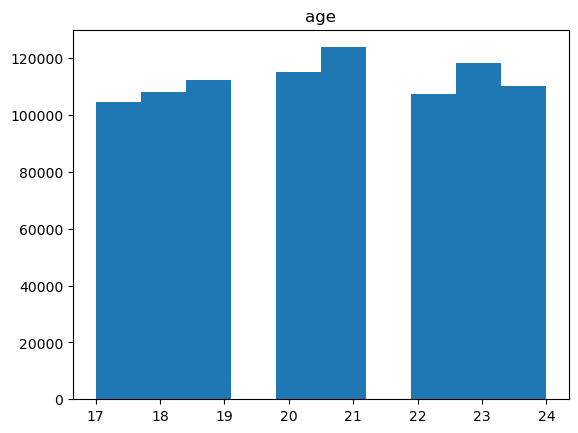

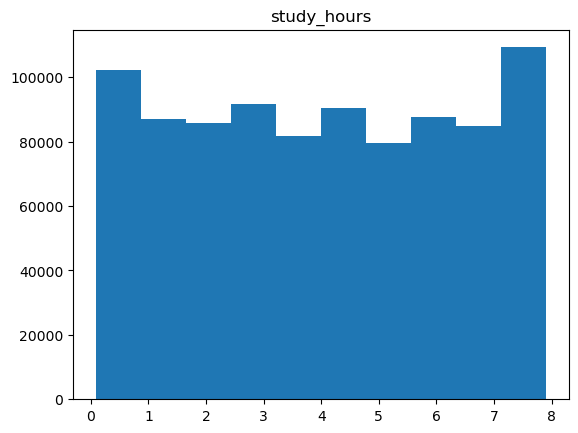

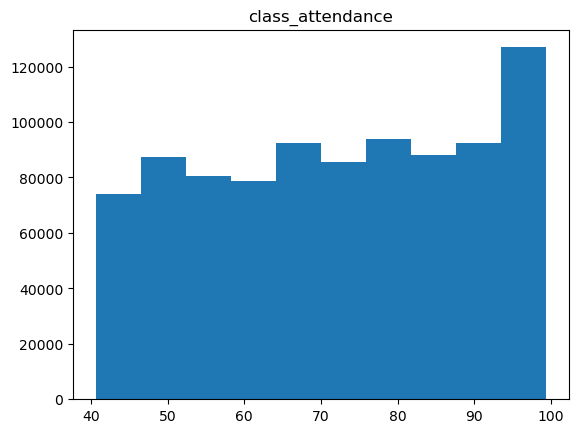

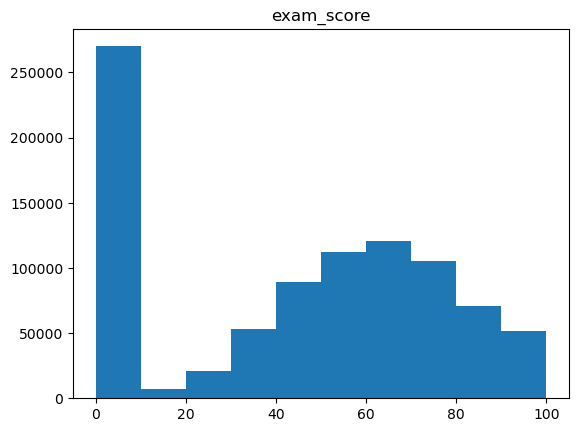

In [49]:
#Distribution of the numerical features
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

We can see that 'Study Hours', 'Sleep Hours', 'Class Attendance', and 'Age' do NOT follow a normal distribution. Instead, they follow a Uniform Distribution, meaning the data is spread evenly across the range without any central peak. Only 'Exam Score' follows a normal distribution (bell curve), which is typical for test results and requires no transformation to fix skewness.

                       age  study_hours  class_attendance  exam_score
age               1.000000     0.007554          0.005024    0.004536
study_hours       0.007554     1.000000          0.087881    0.308257
class_attendance  0.005024     0.087881          1.000000    0.146200
exam_score        0.004536     0.308257          0.146200    1.000000


<Axes: >

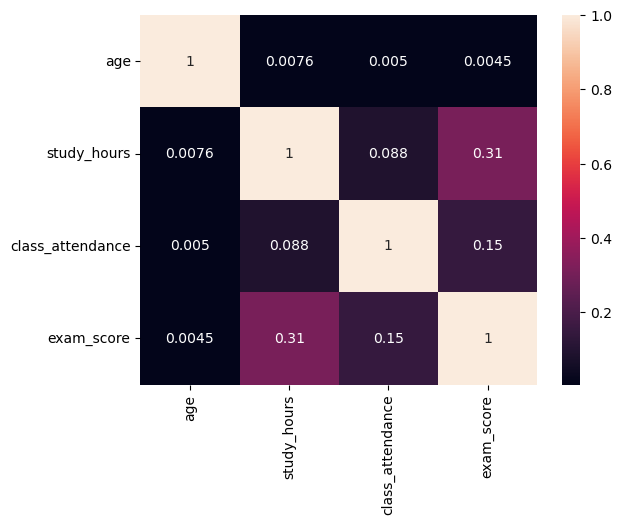

In [50]:
print(df_num.corr())
sns.heatmap(df_num.corr(), annot=True)

C:\Users\marti\AppData\Local\Temp\ipykernel_18020\1124316192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


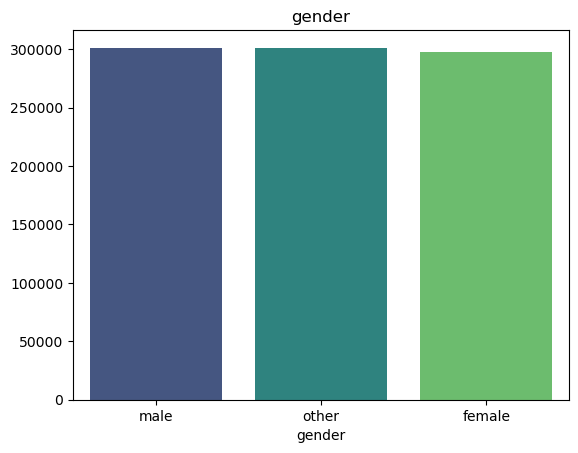

C:\Users\marti\AppData\Local\Temp\ipykernel_18020\1124316192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


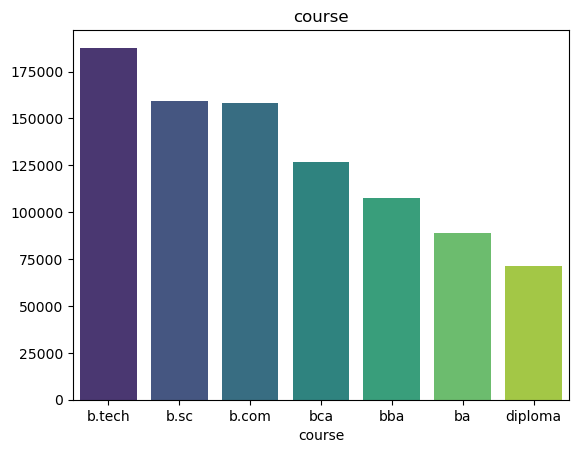

C:\Users\marti\AppData\Local\Temp\ipykernel_18020\1124316192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


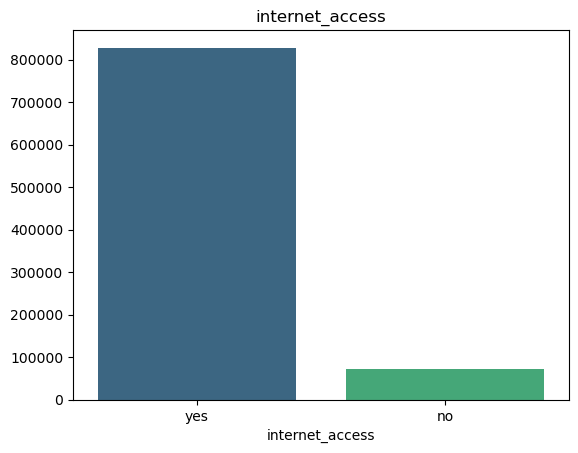

C:\Users\marti\AppData\Local\Temp\ipykernel_18020\1124316192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


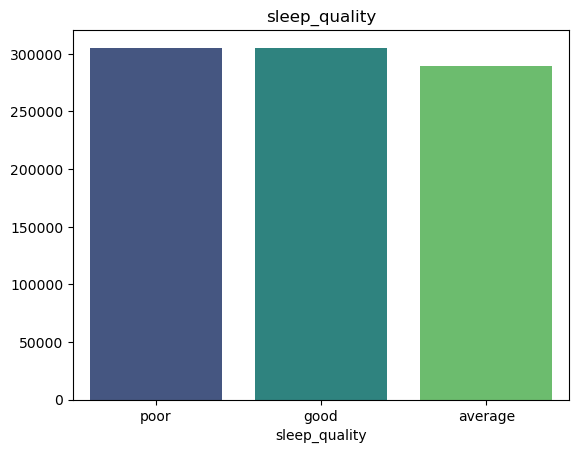

C:\Users\marti\AppData\Local\Temp\ipykernel_18020\1124316192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


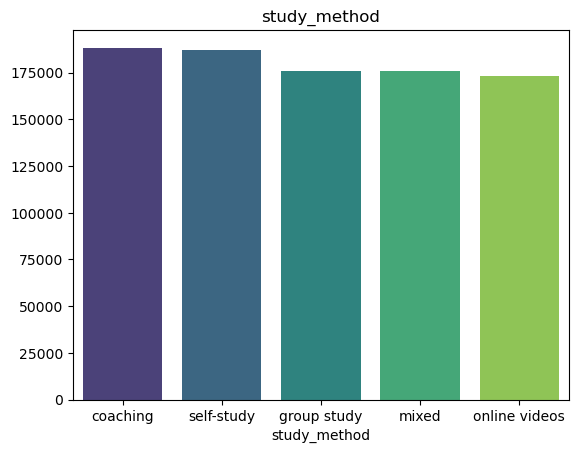

C:\Users\marti\AppData\Local\Temp\ipykernel_18020\1124316192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


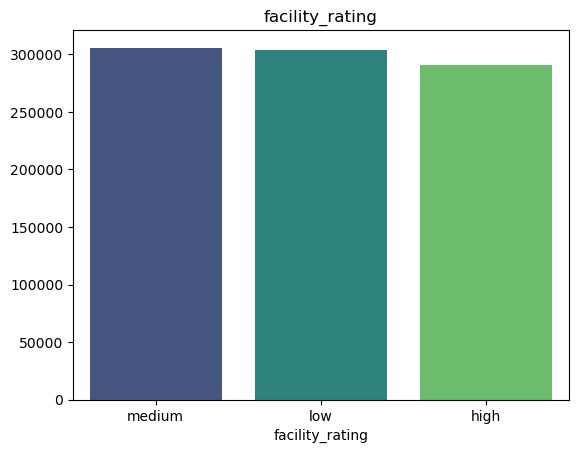

C:\Users\marti\AppData\Local\Temp\ipykernel_18020\1124316192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


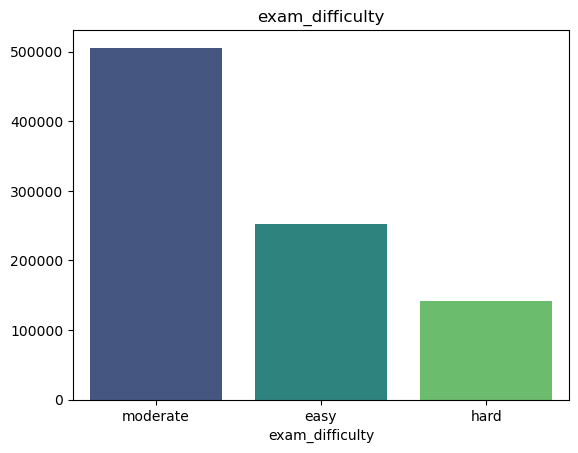

In [51]:
for i in df_cat.columns:
    sns.barplot(
        x=df_cat[i].value_counts().index, 
        y=df_cat[i].value_counts().values,
        palette='viridis'
    ).set_title(i)
    plt.show()

In [52]:
# Compare exam score rate across per sleep quality
pd.pivot_table(df, values='exam_score', index='sleep_quality', aggfunc='mean')


,exam_score
sleep_quality,
average,43.944397
good,47.452368
poor,39.883110


In [53]:
# Compare exam score rate across per study method
pd.pivot_table(df, values='exam_score', index='study_method', aggfunc='mean')

,exam_score
study_method,
coaching,48.420670
group study,42.357376
mixed,45.586548
online videos,41.809601
self-study,40.445812


## Feature Engineering

In [54]:
#Course Grouping (Simplifying the degrees)
#We map the 7 specific degrees into 3 broader categories.

course_map = {
    'b.tech': 'STEM', 'b.sc': 'STEM', 'bca': 'STEM',   # Science/Tech
    'ba': 'Arts', 'b.com': 'Business', 'bba': 'Business', # Arts/Business
    'diploma': 'Vocational' # Other
}
df['course_type'] = df['course'].map(course_map)

#Total Engagement Score
#We multiply study hours by attendance (normalized to 0-1)
#Idea: High attendance makes every study hour more effective!
df['engagement_score'] = df['study_hours'] * (df['class_attendance'] / 100)

#Total Burnout Ratio
#How much do they study per hour of sleep?
#High number = Potential burnout (might lower exam score)
df['burnout_ratio'] = df['study_hours'] / df['sleep_hours']

#"Good Habits" Count
#Let's count how many positive flags a student has (Internet + Good Sleep + High Facility)
#We convert Yes/No and Good/Bad to 1/0 and sum them up.
df['good_habits'] = (
    (df['internet_access'] == 'yes').astype(int) + 
    (df['sleep_quality'] == 'good').astype(int) + 
    (df['facility_rating'] == 'high').astype(int)
)

df.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score,course_type,engagement_score,burnout_ratio,good_habits
id,,,,,,,,,,,,,,,,
0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3,STEM,7.81508,1.614286,0
1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7,Vocational,4.69260,1.053191,1
2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0,STEM,4.33368,0.806897,2
3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9,STEM,0.99000,0.240964,2
4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0,STEM,6.64785,0.796875,3


## Model Preprocessing

In [55]:
#Train/Test Split Flag
df['train_test'] = df.index.map(lambda x: 1 if x < 630000 else 0)

#Encode Ordinal Data
df['sleep_quality'] = df['sleep_quality'].map({'poor': 0, 'average': 1, 'good': 2})
df['exam_difficulty'] = df['exam_difficulty'].map({'easy': 0, 'moderate': 1, 'hard': 2})
df['facility_rating'] = df['facility_rating'].map({'low': 0, 'medium': 1, 'high': 2})
df['internet_access'] = df['internet_access'].map({'no': 0, 'yes': 1})

#Encode Nominal Data using One-Hot Encoding (with drop_first to avoid multicollinearity)
df = pd.get_dummies(df, columns=['gender', 'course_type', 'study_method'], drop_first=True)

#Scale Data
#Add the NEW features to the list of things to scale
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

cols_to_scale = [
    'age', 'study_hours', 'sleep_hours', 'class_attendance', 
    'engagement_score', 'burnout_ratio'  
]
df[cols_to_scale] = scale.fit_transform(df[cols_to_scale])

#Drop the old 'course' column 
if 'course' in df.columns:
    df = df.drop(columns=['course'])

#Final Split
X_train = df[df.train_test == 1].drop(['train_test', 'exam_score'], axis=1)
X_test = df[df.train_test == 0].drop(['train_test', 'exam_score'], axis=1)
y_train = df[df.train_test == 1].exam_score



## Model Building (Baseline Validation Performance)

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor


#Model 1: Linear Regression
model_1 = LinearRegression()
cv_1 = cross_val_score(model_1, X_train, y_train, cv=3, scoring='r2')
print(f"Model 1 (Linear Regression): {cv_1.mean():.4f}")

#Model 2: Ridge Regression
model_2 = Ridge(alpha=10)
cv_2 = cross_val_score(model_2, X_train, y_train, cv=3, scoring='r2')
print(f"Model 2 (Ridge Regression): {cv_2.mean():.4f}")

#Model 3: Decision Tree Regressor
model_3 = DecisionTreeRegressor(max_depth=10, random_state=1)
cv_3 = cross_val_score(model_3, X_train, y_train, cv=3, scoring='r2')
print(f"Model 3 (Decision Tree): {cv_3.mean():.4f}")

#Model 4: HistGradientBoostingRegressor
model_4 = HistGradientBoostingRegressor(random_state=1)
cv_4 = cross_val_score(model_4, X_train, y_train, cv=3, scoring='r2')
print(f"Model 4 (Gradient Boosting): {cv_4.mean():.4f}")

#Model 5: Random Forest Regressor 
model_5 = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=1, n_jobs=-1)
cv_5 = cross_val_score(model_5, X_train, y_train, cv=3, scoring='r2')
print(f"Model 5 (Random Forest): {cv_5.mean():.4f}")

Model 1 (Linear Regression): 0.7789
Model 2 (Ridge Regression): 0.7789
Model 3 (Decision Tree): 0.7471
Model 4 (Gradient Boosting): 0.7822
Model 5 (Random Forest): 0.7590


## The best model was the Gradient Boosting Regressor

In [57]:
from sklearn.model_selection import GridSearchCV

#Setup the model
hgb = HistGradientBoostingRegressor(random_state=1)

#Define the Parameters
#max_iter: Number of trees (more is usually better but slower)
#learning_rate: How small the steps are (lower is more precise but needs more trees)
#max_depth: How deep each tree can go (controls complexity)
#l2_regularization: Like Ridge regression, stops overfitting
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'l2_regularization': [0, 0.1]
}

#Run Grid Search
#We use cv=3 to keep it fast on this large dataset
#n_jobs=-1 uses all your cores to speed it up
grid_search = GridSearchCV(hgb, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

#Print Results
print(f"Best Score: {grid_search.best_score_:.4f}")
print(f"Best Params: {grid_search.best_params_}")

#Save the best model
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Score: 0.7838
Best Params: {'l2_regularization': 0, 'learning_rate': 0.1, 'max_depth': None, 'max_iter': 300}


## We are ready to sumbit and predict our results!

In [58]:
#Configure the Final Model with the best settings
final_model = HistGradientBoostingRegressor(
    l2_regularization=0.1, 
    learning_rate=0.1, 
    max_depth=None, 
    max_iter=300,
    random_state=1
)

# Train on the full training set
final_model.fit(X_train, y_train)

# Predict on the Test Data
predictions = final_model.predict(X_test)

#Save to CSV
submission = pd.DataFrame({
    'id': X_test.index, 
    'exam_score': predictions
})

submission.to_csv('submission_optimized.csv', index=False)

print(submission.head())

       id  exam_score
0  630000   72.762931
1  630001   71.231890
2  630002   87.714973
3  630003   54.906561
4  630004   45.917739
